In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "079-Yang.csv"
pdf = pd.read_csv(file_path)

In [3]:
pdf.shape

(1000, 4)

In [4]:
pdf.head()

,topic,termNamesStr,domain,count
0,8,"[help, support, food, people, new]",tucson.com,202
1,8,"[help, support, food, people, new]",theguardian.com,407
2,8,"[help, support, food, people, new]",wickedlocal.com,1929
3,8,"[help, support, food, people, new]",cnn.com,208
4,8,"[help, support, food, people, new]",thestar.com.my,387


### Domain vs News Article Count

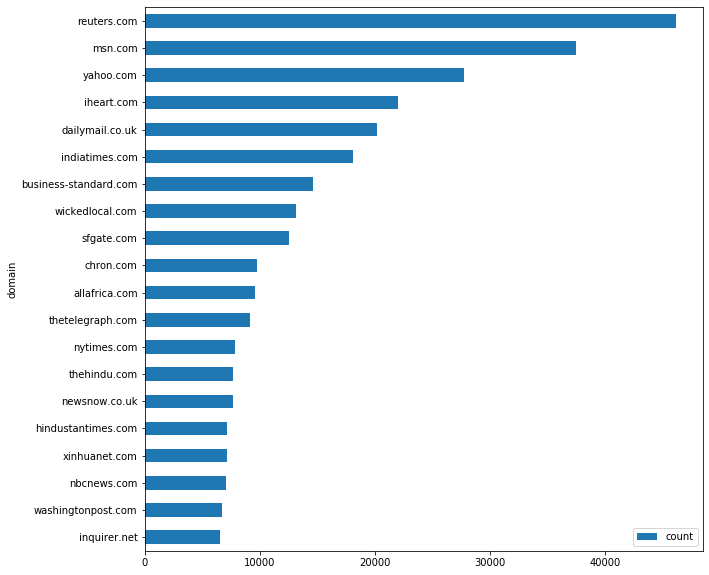

In [5]:
pdf[['domain','count']].groupby(['domain']).sum()\
.sort_values(['count'], ascending=False).head(20)\
.iloc[::-1].plot(kind='barh', figsize=(10,10))

### Topic vs Total Percentage in Dataset

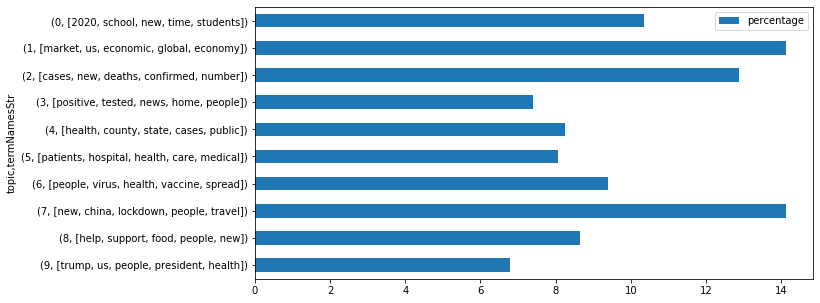

In [6]:
topic_dist = pdf[['topic','termNamesStr','count']]\
.groupby(['topic','termNamesStr']).sum() / pdf['count'].sum()*100

topic_dist.rename(columns={'count':'percentage'}, inplace=True)
topic_dist.iloc[::-1].plot(kind='barh', figsize=(10,5))

## Analysis on Domain and LDA Topics

In [7]:
topic_table = pd.pivot_table(pdf, values=['count'], index='domain', columns='topic', aggfunc=sum)
topic_table

count                                                  \
topic                   0     1     2     3     4     5     6     7     8   
domain                                                                      
680news.com           367   365   386   168   282   195   298   461   266   
abc.net.au            485   256   297   294    55   173   491   605   280   
abs-cbn.com           225   256   571   173   133   267   337   648   279   
accesswdun.com        354   358   576   155   340   204   270   696   127   
aljazeera.com         204   578   597   129    60   280   558  1089   168   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
washingtontimes.com   988   492   629   276  1165   285   396   418   310   
wfmz.com              240   299   401   135   372   216   259   482   225   
wickedlocal.com      1821   398   933  1370  4169   941   874    79  1929   
xinhuanet.com         262   707  2991    91    92   349   421  1722   233   
yahoo.com            2551  7898  2375  1351  1294  1753  2826  3288  2860   

                           
topic                   9  
domain                     
680news.com           352  
abc.net.au             93  
abs-cbn.com           173  
accesswdun.com        460  
aljazeera.com         402  
...                   ...  
washingtontimes.com   822  
wfmz.com              362  
wickedlocal.com       666  
xinhuanet.com         257  
yahoo.com            1573  

[100 rows x 10 columns]

In [8]:
topic_norm = topic_table.div(topic_table.sum(axis=1), axis=0)
topic_norm = topic_norm.droplevel(0,axis=1)
scaler = StandardScaler()
scaler.fit(topic_norm)

topic_scaled = topic_norm
topic_scaled[[0,1,2,3,4,5,6,7,8,9]] = scaler.transform(topic_norm)

In [9]:
scaler = StandardScaler()
scaler.fit(topic_norm)

topic_scaled = topic_norm
topic_scaled[[0,1,2,3,4,5,6,7,8,9]] = scaler.transform(topic_norm)
topic_scaled.columns = topic_dist.reset_index().termNamesStr.unique()
topic_scaled

,"[2020, school, new, time, students]","[market, us, economic, global, economy]","[cases, new, deaths, confirmed, number]","[positive, tested, news, home, people]","[health, county, state, cases, public]","[patients, hospital, health, care, medical]","[people, virus, health, vaccine, spread]","[new, china, lockdown, people, travel]","[help, support, food, people, new]","[trump, us, people, president, health]"
domain,,,,,,,,,,
680news.com,0.257705,-0.076254,-0.068516,-0.344956,0.154899,-0.452887,-0.171814,0.068651,-0.112116,0.979095
abc.net.au,1.199854,-0.360891,-0.427522,0.408896,-0.830123,-0.559413,1.492772,0.960066,0.033120,-1.007745
abs-cbn.com,-0.687881,-0.369063,0.848555,-0.293108,-0.482616,0.083141,0.203595,1.160354,0.008254,-0.378102
accesswdun.com,-0.110069,-0.211837,0.505570,-0.513140,0.240632,-0.548465,-0.633405,0.907415,-1.030136,1.414586
aljazeera.com,-1.195494,0.156540,0.276865,-0.721702,-0.876832,-0.308099,0.877666,2.108193,-0.927640,0.656682
...,...,...,...,...,...,...,...,...,...,...
washingtontimes.com,1.434866,-0.355597,-0.272354,-0.444652,1.690674,-0.726337,-0.825909,-1.186415,-0.696516,1.713506
wfmz.com,-0.540602,-0.222274,0.092228,-0.489774,0.630069,-0.236846,-0.377706,0.310112,-0.290460,1.197012
wickedlocal.com,0.721480,-0.848230,-0.820951,0.528029,3.268752,-0.254373,-0.880103,-2.303399,1.046644,-0.523771


### Topic Standard Deviation by Domains
Examines the allocation of news articles when pertaining to Covid-19 by news outlets. I calculate the standard deviation in relation to the top 1000 news domains in the dataset. 

How to Interpret Example: xinhuanet.com is an outlier when it allocates 4.2 standard deviations above the mean covid articles relating to the topic "cases, new, deaths, confirmed, number".

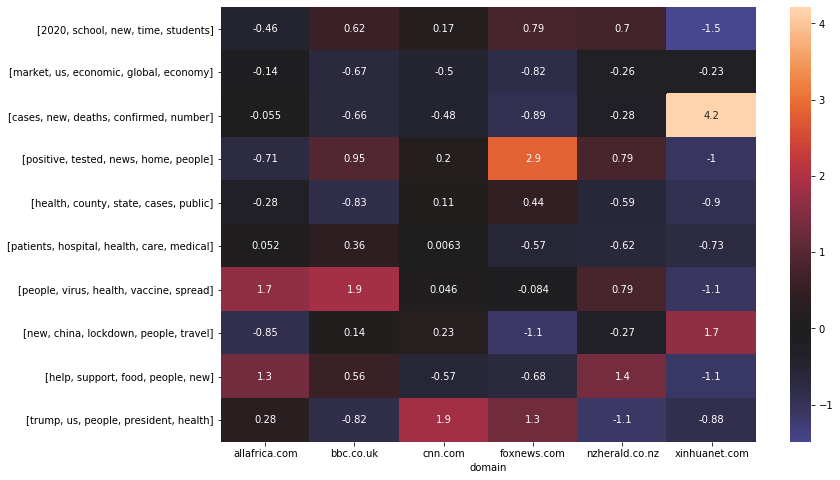

In [10]:
news_list = ['allafrica.com', 'bbc.co.uk', 'cnn.com', 'foxnews.com', 'nzherald.co.nz','xinhuanet.com']
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(topic_scaled.filter(items=news_list, axis=0).T, center=0, annot=True, ax =ax)